In [1]:
from heeps.util.freq_decomp import temporal
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

### Input parameters

In [2]:
os.chdir(os.path.normpath(os.path.expandvars('$HOME/heeps_metis/input_files/wavefront/point')))
qsta_mas_rms = 0.4  # quasistatic (mas rms)
dyn_mas_rms = 2     # dynamic (mas rms)
t_max = 10          # s
dt = 0.1            # s
fc = 0.01           # Hz
xmax = 100          # for figures

std=0.9999999999999999


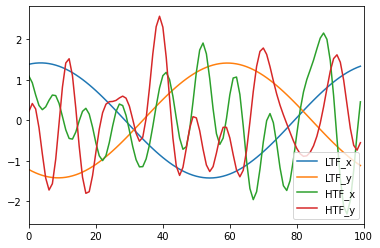

In [3]:
LTF_x = temporal(t_max, dt, 0, fc, seed=409566); plt.plot(LTF_x, label='LTF_x')
LTF_y = temporal(t_max, dt, 0, fc, seed=224788); plt.plot(LTF_y, label='LTF_y')
HTF_x = temporal(t_max, dt, fc, 1, seed=409566); plt.plot(HTF_x, label='HTF_x')
HTF_y = temporal(t_max, dt, fc, 1, seed=224788); plt.plot(HTF_y, label='HTF_y')
plt.legend()
plt.xlim(0, xmax)
print('std=%s'%np.std(LTF_x))

### Create pointing errors (zernikes [2,3])

(100, 2)


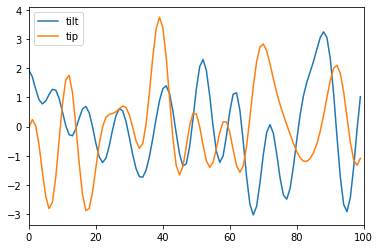

In [4]:
point_QSTA = np.array([LTF_x, LTF_y]).T/np.sqrt(2)          # in xy
point_DYN = np.array([HTF_x, HTF_y]).T/np.sqrt(2)           # in xy
point_ALL = point_QSTA*qsta_mas_rms + point_DYN*dyn_mas_rms # factors in mas
plt.plot(point_ALL[:,0], label='tilt')
plt.plot(point_ALL[:,1], label='tip')
plt.legend()
plt.xlim(0, xmax)
fits.writeto('point_all_%ss_%sms.fits'%(t_max, round(dt*1e3)), 
    np.float32(point_ALL), overwrite=True)
print(point_ALL.shape)

### Synthetic PSD range 0.01-0.1 Hz

(12000, 2)


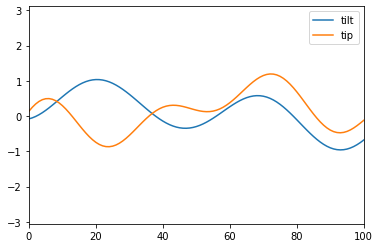

In [5]:
t_max = 3600        # s
dt = 0.3            # s
fc1 = 0.01          # Hz
fc2 = 0.1           # Hz
TF_x = temporal(t_max, dt, fc1, fc2, seed=409566)
TF_y = temporal(t_max, dt, fc1, fc2, seed=224788)
point_err = np.array([TF_x, TF_y]).T/np.sqrt(2) # in xy
plt.plot(point_err[:,0], label='tilt')
plt.plot(point_err[:,1], label='tip')
plt.legend()
plt.xlim(0, xmax)
print(point_err.shape)

In [6]:
for rms in [0.2, 0.4, 0.8, 1.6]: # mas rms
    fits.writeto('point_err_%s-%sHz_%ss_%sms_L_rms_%s.fits'%(fc1, fc2, t_max, 
        round(dt*1e3), rms), np.float32(point_err*rms), overwrite=True)

### jitter (0.1-1 Hz)

(12000, 2)


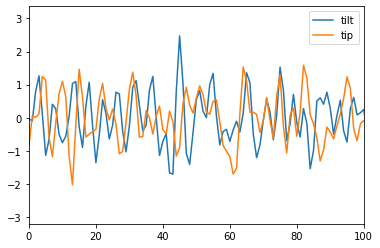

In [7]:
t_max = 3600        # s
dt = 0.3            # s
fc1 = 0.1           # Hz
fc2 = 1             # Hz
TF_x = temporal(t_max, dt, fc1, fc2, seed=409566)
TF_y = temporal(t_max, dt, fc1, fc2, seed=224788)
point_err = np.array([TF_x, TF_y]).T/np.sqrt(2) # in xy
plt.plot(point_err[:,0], label='tilt')
plt.plot(point_err[:,1], label='tip')
plt.legend()
plt.xlim(0, xmax)
print(point_err.shape)

In [8]:
for rms in [1, 2, 3, 5]: # mas rms
    fits.writeto('point_err_%s-%sHz_%ss_%sms_L_rms_%s.fits'%(fc1, fc2, t_max, 
        round(dt*1e3), rms), np.float32(point_err*rms), overwrite=True)